In [20]:
from meteostat import Point,Daily
from datetime import datetime
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [2]:
#start,end = str(input("Enter Start Date in yyy-mm-dd format:")), str(input("Enter End Date in yyy-mm-dd format:"))
#s,e = datetime.strptime(start,"%Y-%M-%D"),datetime.strptime(end,"%Y-%M-%D")
#lat,lon,alt = float(input("Enter Laltitude: ")),float(input("Enter Longtitude:")), float(input("Enter Altitude:"))
#vancouver = Point(lat,lon,alt)
#data = Daily(vancouver,s,e)

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

vancouver = Point(49.2497, -123.1193, 70)
data = Daily(vancouver, start, end)
data = data.fetch()
data
                                                                                        

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,1.7,-0.5,3.9,0.0,0.0,NaN,8.7,0.0,1030.7,NaN
2018-01-02,1.7,-0.5,3.8,0.0,0.0,NaN,7.1,0.0,1028.5,NaN
2018-01-03,2.2,1.1,3.3,0.0,NaN,NaN,6.8,0.0,1022.5,NaN
2018-01-04,4.0,1.5,6.5,0.0,0.0,NaN,6.1,0.0,1016.7,NaN
2018-01-05,7.5,5.6,9.4,30.4,0.0,NaN,10.0,0.0,1014.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,3.5,1.7,5.2,0.0,0.0,74.0,7.2,NaN,1027.8,NaN
2018-12-28,3.7,2.7,4.7,24.5,0.0,66.0,17.6,NaN,1025.2,NaN
2018-12-29,7.4,4.5,10.2,16.6,0.0,180.0,25.3,208.8,1013.7,NaN


In [3]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [4]:
def scatterPlot(X,Y):
    if type(X[1]) is np.datetime64:
        X=pd.to_datetime(X)
        X = [str(i.date()) for i in X]
        plt.scatter(X,Y)
        return plt.show()
    else:
        plt.scatter(X,Y)
        return plt.show()
    
    return plt.show()
def histogram(X):
    plt.hist(X)
    return plt.show()
    

In [18]:
def barPlot(X,Y):
    if type(X[1]) is np.datetime64:
        X=pd.to_datetime(X)
        labels = [str(i.date()) for i in X]
        Bar = [i for i in Y]
        plt.bar(labels,Bar)
        return plt.show()
    else:
        labels = [i for i in X]
        Bar = [i for i in Y]
        plt.bar(labels,Bar)
        return plt.show()
def boxPlot(X,Y):
    
    return 
def linePlot(X,Y):
    if type(X[1]) is np.datetime64:
        X=pd.to_datetime(X)
        X= [str(i.date()) for i in X]
        plt.plot(X,Y)
        return plt.show()
    else:
        X = [i for i in X]
        plt.plot(X,Y)
        return plt.show()
    
    return plt.show()
from prophet import Prophet
def ClassicTimeSeriesPrediction(X,Y):
    if type(X[1]) is np.datetime64:
        X=pd.to_datetime(X)
        X= [i.date() for i in X]
    df = pd.DataFrame(np.stack((X,Y),axis=-1),columns=['ds','y'])
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods =50)
    glimpse=future.tail()
    forecast = m.predict(future)
    forecast[['ds','yhat','yhat_lower','yhat_upper']].head()
    m.plot(forecast,uncertainty = True)
    return glimpse,forecast[['ds','yhat','yhat_lower','yhat_upper']].head(),plt.show()
def HeatMap(X,Y):
    arr = np.array([[i for i in X],[i for i in Y]])
    plt.imshow(float(arr))
    plt.colorbar()
    return plt.show()
def compareActualvsPredGraph():
    pass
def CheckandDropNullColumn(X):
    if data[X].isnull().all():
        data = data.drop(X,1)
        return data
    else:
        return print("All Values are not NULL")
def checkandfillNanValues(arr):
    if np.where(np.isnan(Y))[0] is None:
        return arr
    else:
        indx=np.where(np.isnan(Y))
        indx = [i for i in indx[0]]
        arr[indx]=np.nanmean(Y)
        return arr



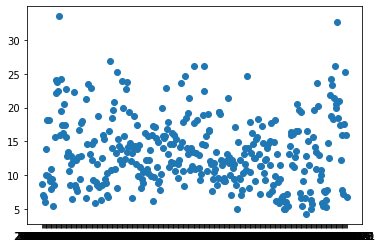

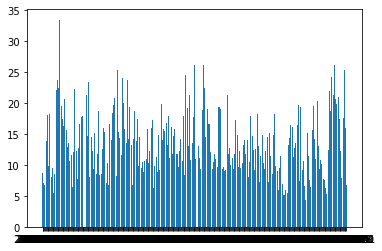

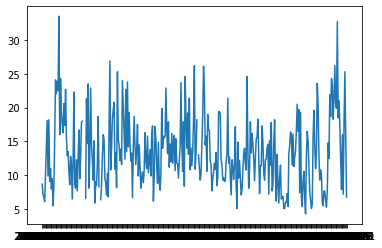

01:07:28 - cmdstanpy - INFO - Chain [1] start processing
01:07:29 - cmdstanpy - INFO - Chain [1] done processing


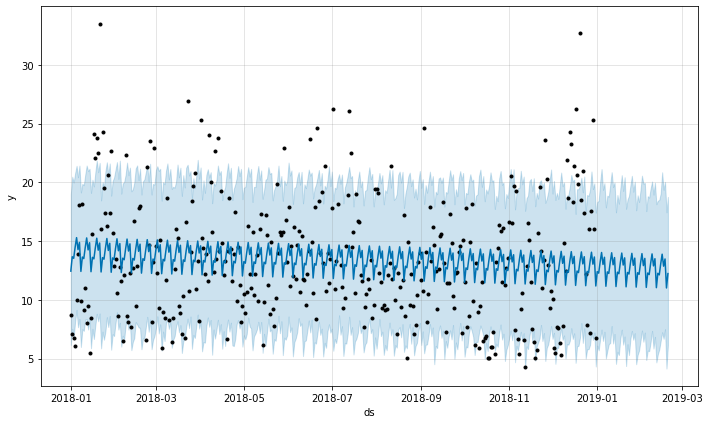

(            ds
 410 2019-02-15
 411 2019-02-16
 412 2019-02-17
 413 2019-02-18
 414 2019-02-19,
           ds       yhat  yhat_lower  yhat_upper
 0 2018-01-01  12.448390    6.164435   18.977429
 1 2018-01-02  13.670662    7.540110   20.479620
 2 2018-01-03  13.539924    6.825120   19.991295
 3 2018-01-04  14.475308    8.165634   20.783437
 4 2018-01-05  15.296951    9.149262   21.406365,
 None)

In [19]:
X =data.index.get_level_values("time").values
Y=data['wspd'].values
scatterPlot(X,Y)
barPlot(X,Y)
linePlot(X,Y)
#HeatMap(X,Y) #Function Parameters are not designed for date inputs. 
ClassicTimeSeriesPrediction(X,Y)